In [155]:
#pandas libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.model_selection as modsel
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

%run "../notebooks/cargar_df.ipynb"

In [156]:
train = get_train()

In [157]:
test = get_test()

In [158]:
train.head().T

,0,1,2,3,4
ID,27761,27760,27446,16808,16805
Region,EMEA,EMEA,Americas,Americas,Americas
Territory,None,None,NW America,NW America,NW America
"Pricing, Delivery_Terms_Quote_Appr",1,0,0,1,1
"Pricing, Delivery_Terms_Approved",1,0,0,0,0
Bureaucratic_Code_0_Approval,1,0,0,1,1
Bureaucratic_Code_0_Approved,1,0,0,0,0
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_5
Account_Created_Date,2015-06-16 00:00:00,2015-06-16 00:00:00,2015-04-21 00:00:00,2013-07-27 00:00:00,2013-07-27 00:00:00
Source,None,None,Source_7,Source_11,Source_11


In [159]:
test.head().T

,0,1,2,3,4
ID,6140,6146,6151,6118,6124
Region,EMEA,EMEA,EMEA,EMEA,EMEA
Territory,Germany,Germany,Germany,Germany,Germany
"Pricing, Delivery_Terms_Quote_Appr",1,1,1,1,1
"Pricing, Delivery_Terms_Approved",1,1,1,1,1
Bureaucratic_Code_0_Approval,1,1,1,1,1
Bureaucratic_Code_0_Approved,1,1,1,1,1
Bureaucratic_Code,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4,Bureaucratic_Code_4
Account_Created_Date,2017-07-05 00:00:00,2017-07-05 00:00:00,2017-07-05 00:00:00,2017-07-05 00:00:00,2017-07-05 00:00:00
Source,Source_7,Source_7,Source_7,Source_7,Source_7


In [160]:
train = train[train.Stage.isin(['Closed Won', 'Closed Lost'])].copy()
train.shape

(16883, 47)

In [161]:
train.Stage.value_counts()

Closed Won     9533
Closed Lost    7350
Name: Stage, dtype: int64

In [162]:
# Me quedo con los registros con la oportunidad terminada
train.Stage.replace({'Closed Won': 1, 'Closed Lost': 0}, inplace=True)

In [163]:
train.Stage.value_counts()

1    9533
0    7350
Name: Stage, dtype: int64

In [164]:
X, y = pd.DataFrame(train['ID']), train['Stage']

In [165]:
# Hago lo mismo con test
testX = pd.DataFrame(test['ID'])

In [166]:
train['Pricing, Delivery_Terms_Quote_Appr'].value_counts()

1    13629
0     3254
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

In [167]:
train['Pricing, Delivery_Terms_Approved'].value_counts()

1    9847
0    7036
Name: Pricing, Delivery_Terms_Approved, dtype: int64

In [168]:
train[(train['Pricing, Delivery_Terms_Quote_Appr'] == 0)\
      & (train['Pricing, Delivery_Terms_Approved'] == 0)].shape

(3254, 47)

In [169]:
pricing_ok = train.agg(lambda x: int(x['Pricing, Delivery_Terms_Quote_Appr'] \
              == x['Pricing, Delivery_Terms_Approved']), axis = 1)
pricing_ok 

0        1
1        1
2        1
3        0
4        0
        ..
16942    1
16943    1
16944    1
16945    1
16946    1
Length: 16883, dtype: int64

In [170]:
X['Pricing, Delivery_Terms_Quote_Appr'] = train['Pricing, Delivery_Terms_Quote_Appr']
X['Pricing, Delivery_Terms_Approved'] = train['Pricing, Delivery_Terms_Approved']

# Binaria, es 1 si se necesitaba aprobación y se aprobó o si no la necesitaba
X['pricing_aprobada'] = pricing_ok

X.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada
0,27761,1,1,1
1,27760,0,0,1
2,27446,0,0,1
3,16808,1,0,0
4,16805,1,0,0


In [171]:
# Hago lo mismo con el set de test

testX['Pricing, Delivery_Terms_Quote_Appr'] = test['Pricing, Delivery_Terms_Quote_Appr']
testX['Pricing, Delivery_Terms_Approved'] = test['Pricing, Delivery_Terms_Approved']

# Binaria, es 1 si se necesitaba aprobación y se aprobó o si no la necesitaba
pricing_ok_test = test.agg(lambda x: int(x['Pricing, Delivery_Terms_Quote_Appr'] \
              == x['Pricing, Delivery_Terms_Approved']), axis = 1)
testX['pricing_aprobada'] = pricing_ok_test

Agrego features binarios Bureaucratic_Code

In [172]:
bureaucratic_ok = train.agg(lambda x: int(x['Bureaucratic_Code_0_Approval'] \
              == x['Bureaucratic_Code_0_Approved']), axis = 1)
bureaucratic_ok 

0        1
1        1
2        1
3        0
4        0
        ..
16942    1
16943    1
16944    1
16945    1
16946    1
Length: 16883, dtype: int64

In [173]:
X['Bureaucratic_Code_0_Approval'] = train['Bureaucratic_Code_0_Approval']
X['Bureaucratic_Code_0_Approved'] = train['Bureaucratic_Code_0_Approved']

# Binaria, es 1 si se necesitaba aprobación y se aprobó o si no la necesitaba
# Si necesitaba aprobacion y no se aprobo es 0
X['bureaucratic_aprobada'] = bureaucratic_ok

X.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada
0,27761,1,1,1,1,1,1
1,27760,0,0,1,0,0,1
2,27446,0,0,1,0,0,1
3,16808,1,0,0,1,0,0
4,16805,1,0,0,1,0,0


In [174]:
# Hago lo mismo con el set de test

testX['Bureaucratic_Code_0_Approval'] = test['Bureaucratic_Code_0_Approval']
testX['Bureaucratic_Code_0_Approved'] = test['Bureaucratic_Code_0_Approved']

# Binaria, es 1 si se necesitaba aprobación y se aprobó o si no la necesitaba
# Si necesitaba aprobacion y no se aprobo es 0
bureaucratic_ok_test = test.agg(lambda x: int(x['Bureaucratic_Code_0_Approval'] \
              == x['Bureaucratic_Code_0_Approved']), axis = 1)
testX['bureaucratic_aprobada'] = bureaucratic_ok_test

In [175]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(X.drop(['ID'], axis=1), y, test_size=0.2, random_state=123)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (rmse))

Log Loss: 0.607939


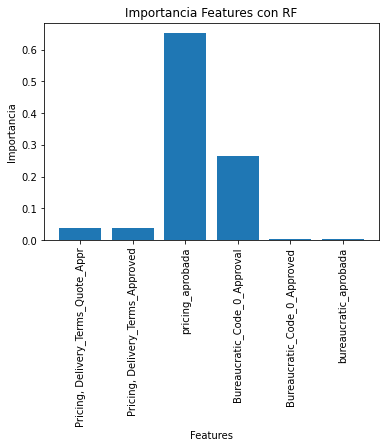

In [176]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

Agrego feature de Bureaucratic code a one hot encoder

In [177]:
train.Bureaucratic_Code.value_counts()

Bureaucratic_Code_4    12544
Bureaucratic_Code_5     3782
Bureaucratic_Code_1      261
Bureaucratic_Code_2      242
Bureaucratic_Code_0       51
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [178]:
one_hot_enc_train = pd.get_dummies(train.Bureaucratic_Code)
one_hot_enc_test = pd.get_dummies(test.Bureaucratic_Code)

one_hot_enc_train, one_hot_enc_test = one_hot_enc_train\
    .align(one_hot_enc_test, join='left', axis=1)

X2 = pd.concat([X,one_hot_enc_train], axis=1, sort=False)
X2.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,Bureaucratic_Code_0,Bureaucratic_Code_1,Bureaucratic_Code_2,Bureaucratic_Code_3,Bureaucratic_Code_4,Bureaucratic_Code_5,Bureaucratic_Code_6
0,27761,1,1,1,1,1,1,0,0,0,0,1,0,0
1,27760,0,0,1,0,0,1,0,0,0,0,1,0,0
2,27446,0,0,1,0,0,1,0,0,0,0,1,0,0
3,16808,1,0,0,1,0,0,0,0,0,0,0,1,0
4,16805,1,0,0,1,0,0,0,0,0,0,0,1,0


In [179]:
# Hago lo mismo con el set de test
testX2 = pd.concat([testX, one_hot_enc_test], axis=1, sort=False).replace(np.nan, np.uint8(0))

In [180]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(X2.drop(['ID'], axis=1), y, test_size=0.2, random_state=123)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (rmse))

Log Loss: 0.602792


In [181]:
p = pd.DataFrame({'feature':X_train.columns, 'value':rf_model.feature_importances_})
p = p.sort_values('value')

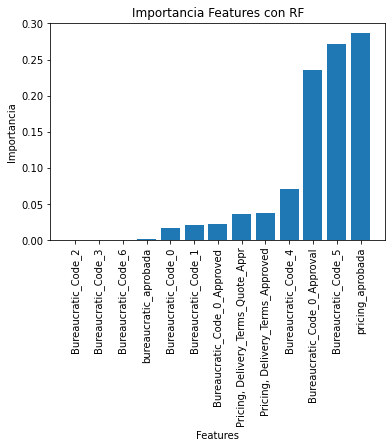

In [182]:
plt.bar(p.feature, p.value)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

In [31]:
train[train.Bureaucratic_Code == 'Bureaucratic_Code_5'].Stage.value_counts()

0    2771
1    1011
Name: Stage, dtype: int64

In [33]:
train[train.Bureaucratic_Code == 'Bureaucratic_Code_4'].Stage.value_counts()

1    8253
0    4291
Name: Stage, dtype: int64

In [127]:
train['Source '].value_counts()

None         9454
Source_7     2952
Source_9     1457
Source_11    1421
Source_13     783
Source_3      415
Source_1      137
Source_10     106
Source_2       86
Source_4       43
Source_6       19
Source_0        7
Source_12       2
Source_5        1
Name: Source , dtype: int64

Paso account type a one hot encoder

In [57]:
train['Account_Type'].value_counts()

Account_Type_2    8786
Account_Type_0    5866
Account_Type_5    1928
Account_Type_1     164
None               112
Account_Type_6      17
Account_Type_4      10
Name: Account_Type, dtype: int64

In [183]:
one_hot_enc_train = pd.get_dummies(train.Account_Type)
one_hot_enc_test = pd.get_dummies(test.Account_Type)

one_hot_enc_train, one_hot_enc_test = one_hot_enc_train\
    .align(one_hot_enc_test, join='left', axis=1)

X2 = pd.concat([X,one_hot_enc_train], axis=1, sort=False)
X2.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,Account_Type_0,Account_Type_1,Account_Type_2,Account_Type_4,Account_Type_5,Account_Type_6,None
0,27761,1,1,1,1,1,1,0,0,1,0,0,0,0
1,27760,0,0,1,0,0,1,0,0,1,0,0,0,0
2,27446,0,0,1,0,0,1,0,0,0,0,1,0,0
3,16808,1,0,0,1,0,0,0,0,0,0,1,0,0
4,16805,1,0,0,1,0,0,0,0,0,0,1,0,0


In [184]:
# Hago lo mismo con el set de test
testX2 = pd.concat([testX, one_hot_enc_test], axis=1, sort=False).replace(np.nan, np.uint8(0))

In [186]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(X2.drop(['ID'], axis=1), y, test_size=0.2, random_state=123)

rf_model = RandomForestRegressor(random_state=123, criterion=log_loss)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (rmse))

KeyError: <function log_loss at 0x7f5813382620>

In [61]:
p = pd.DataFrame({'feature':X_train.columns, 'value':rf_model.feature_importances_})
p = p.sort_values('value')

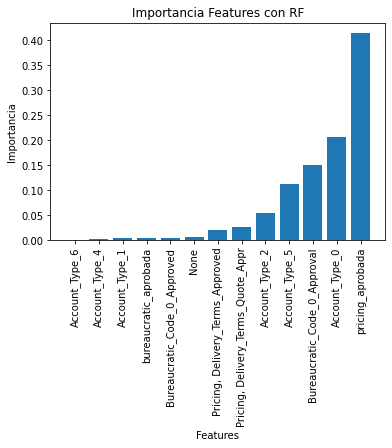

In [62]:
plt.bar(p.feature, p.value)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

In [131]:
train.Billing_Country.value_counts()

Japan            4856
United States    3790
Germany          1977
Australia        1165
India             671
                 ... 
Kenya               1
Chile               1
Colombia            1
Peru                1
Oman                0
Name: Billing_Country, Length: 80, dtype: int64

Delivery quarter a one hot encoder

In [63]:
one_hot_enc_train = pd.get_dummies(train.Delivery_Quarter)
one_hot_enc_test = pd.get_dummies(test.Delivery_Quarter)

one_hot_enc_train, one_hot_enc_test = one_hot_enc_train\
    .align(one_hot_enc_test, join='left', axis=1)

X2 = pd.concat([X,one_hot_enc_train], axis=1, sort=False)
X2.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,Q1,Q2,Q3,Q4
0,27761,1,1,1,1,1,1,0,1,0,0
1,27760,0,0,1,0,0,1,1,0,0,0
2,27446,0,0,1,0,0,1,1,0,0,0
3,16808,1,0,0,1,0,0,1,0,0,0
4,16805,1,0,0,1,0,0,1,0,0,0


In [64]:
# Hago lo mismo con el set de test
testX2 = pd.concat([testX, one_hot_enc_test], axis=1, sort=False).replace(np.nan, np.uint8(0))

In [65]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(X2.drop(['ID'], axis=1), y, test_size=0.2, random_state=123)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (rmse))

Log Loss: 0.600610


In [66]:
p = pd.DataFrame({'feature':X_train.columns, 'value':rf_model.feature_importances_})
p = p.sort_values('value')

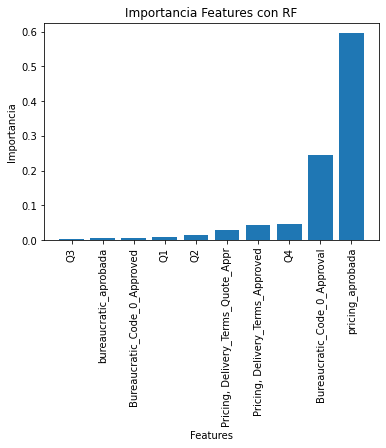

In [67]:
plt.bar(p.feature, p.value)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

Delivery year a one hot encoder

In [68]:
one_hot_enc_train = pd.get_dummies(train.Delivery_Year)
one_hot_enc_test = pd.get_dummies(test.Delivery_Year)

one_hot_enc_train, one_hot_enc_test = one_hot_enc_train\
    .align(one_hot_enc_test, join='left', axis=1)

X2 = pd.concat([X,one_hot_enc_train], axis=1, sort=False)
X2.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,2016,2017,2018,2019
0,27761,1,1,1,1,1,1,1,0,0,0
1,27760,0,0,1,0,0,1,1,0,0,0
2,27446,0,0,1,0,0,1,1,0,0,0
3,16808,1,0,0,1,0,0,0,0,1,0
4,16805,1,0,0,1,0,0,0,0,1,0


In [69]:
# Hago lo mismo con el set de test
testX2 = pd.concat([testX, one_hot_enc_test], axis=1, sort=False).replace(np.nan, np.uint8(0))

In [70]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(X2.drop(['ID'], axis=1), y, test_size=0.2, random_state=123)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (rmse))

Log Loss: 0.577420


In [89]:
p = pd.DataFrame({'feature':X_train.columns, 'value':rf_model.feature_importances_})
p = p.sort_values('value')

In [92]:
p.feature.rename(index={2016:'2016', 2017:'2017', 2018:'2018', 2019:'2019'}, inplace=True)

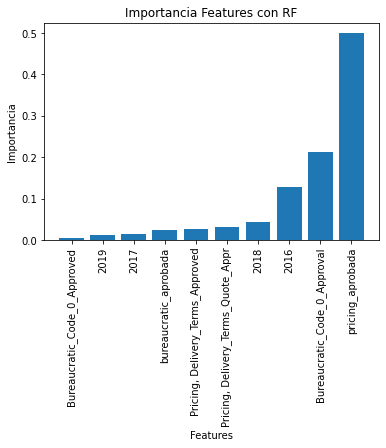

In [94]:
plt.bar(p.feature, p.value)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

Paso month a one hot encoding

In [177]:
train.Month.agg(lambda x: str(x)[5:7]).value_counts()

10    1668
03    1627
06    1557
07    1486
04    1476
05    1390
02    1383
11    1290
01    1285
09    1276
08    1269
12    1176
Name: Month, dtype: int64

In [95]:
one_hot_enc_train = pd.get_dummies(train.Month.agg(lambda x: str(x)[5:7]))
one_hot_enc_test = pd.get_dummies(test.Month.agg(lambda x: str(x)[5:7]))

one_hot_enc_train, one_hot_enc_test = one_hot_enc_train\
    .align(one_hot_enc_test, join='left', axis=1)

X2 = pd.concat([X,one_hot_enc_train], axis=1, sort=False)
X2.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,01,02,03,04,05,06,07,08,09,10,11,12
0,27761,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,27760,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,27446,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
3,16808,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,16805,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [96]:
# Hago lo mismo con el set de test
testX2 = pd.concat([testX, one_hot_enc_test], axis=1, sort=False).replace(np.nan, np.uint8(0))
testX2.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,01,02,03,04,05,06,07,08,09,10,11,12
0,6140,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,6146,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0
2,6151,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,6118,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0
4,6124,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [97]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(X2.drop(['ID'], axis=1), y, test_size=0.2, random_state=123)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (rmse))

Log Loss: 0.595864


In [98]:
p = pd.DataFrame({'feature':X_train.columns, 'value':rf_model.feature_importances_})
p = p.sort_values('value')

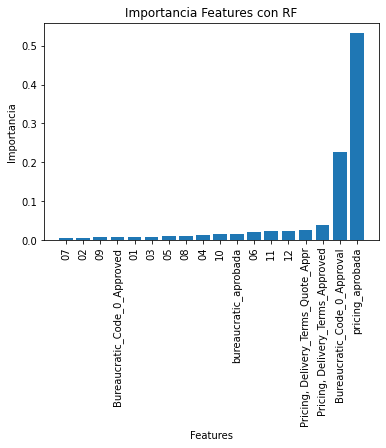

In [99]:
plt.bar(p.feature, p.value)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

In [ ]:
 Agrego account type, delivery year

In [100]:
one_hot_enc_train = pd.get_dummies(train.Account_Type)
one_hot_enc_test = pd.get_dummies(test.Account_Type)

one_hot_enc_train, one_hot_enc_test = one_hot_enc_train\
    .align(one_hot_enc_test, join='left', axis=1)

X = pd.concat([X,one_hot_enc_train], axis=1, sort=False)
X.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,Account_Type_0,Account_Type_1,Account_Type_2,Account_Type_4,Account_Type_5,Account_Type_6,None
0,27761,1,1,1,1,1,1,0,0,1,0,0,0,0
1,27760,0,0,1,0,0,1,0,0,1,0,0,0,0
2,27446,0,0,1,0,0,1,0,0,0,0,1,0,0
3,16808,1,0,0,1,0,0,0,0,0,0,1,0,0
4,16805,1,0,0,1,0,0,0,0,0,0,1,0,0


In [101]:
# Hago lo mismo con el set de test
testX = pd.concat([testX, one_hot_enc_test], axis=1, sort=False).replace(np.nan, np.uint8(0))

In [102]:
one_hot_enc_train = pd.get_dummies(train.Delivery_Year)
one_hot_enc_test = pd.get_dummies(test.Delivery_Year)

one_hot_enc_train, one_hot_enc_test = one_hot_enc_train\
    .align(one_hot_enc_test, join='left', axis=1)

X = pd.concat([X,one_hot_enc_train], axis=1, sort=False)
X.head()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",pricing_aprobada,Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,bureaucratic_aprobada,Account_Type_0,Account_Type_1,Account_Type_2,Account_Type_4,Account_Type_5,Account_Type_6,None,2016,2017,2018,2019
0,27761,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0
1,27760,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,27446,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,16808,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,16805,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [103]:
# Hago lo mismo con el set de test
testX = pd.concat([testX, one_hot_enc_test], axis=1, sort=False).replace(np.nan, np.uint8(0))

In [105]:
# Calculo el error
X_train, X_test, y_train, y_test = \
    train_test_split(X.drop(['ID'], axis=1), y, test_size=0.2, random_state=123)

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (rmse))

Log Loss: 0.552153


In [106]:
p = pd.DataFrame({'feature':X_train.columns, 'value':rf_model.feature_importances_})
p = p.sort_values('value')

In [119]:
p.feature.rename(index=\
    {2016:'2016', 2017:'2017', 2018:'2018', 2019:'2019', None:'None'}, inplace=True)

In [120]:
p.feature

11                        Account_Type_6
9                         Account_Type_4
7                         Account_Type_1
4           Bureaucratic_Code_0_Approved
12                                  None
14                                  2017
5                  bureaucratic_aprobada
0     Pricing, Delivery_Terms_Quote_Appr
1       Pricing, Delivery_Terms_Approved
16                                  2019
15                                  2018
13                                  2016
8                         Account_Type_2
10                        Account_Type_5
3           Bureaucratic_Code_0_Approval
6                         Account_Type_0
2                       pricing_aprobada
Name: feature, dtype: object

In [ ]:
#plt.bar(p.feature, p.value)
#plt.xlabel('Features')
#plt.xticks(rotation=90)
#plt.ylabel('Importancia')
#plt.title('Importancia Features con RF')
#plt.show()

## Prediccion

In [122]:
X_train, X_test, y_train, y_test = \
    train_test_split(X.drop(['ID'], axis=1), y, test_size=0.2, random_state=123)

In [123]:
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
rmse = log_loss(y_test, preds, normalize=True)
print("Log Loss: %f" % (rmse))

Log Loss: 0.552153


In [124]:
# Gini importance
rf_model.feature_importances_

array([0.01954096, 0.02034893, 0.35101618, 0.12912684, 0.00582495,
       0.01523283, 0.1728345 , 0.00324319, 0.04871435, 0.0015717 ,
       0.10065117, 0.00094764, 0.00649602, 0.04733785, 0.00951238,
       0.04473124, 0.02286926])

In [125]:
X_train.rename(columns={2016:'2016', 2017:'2017', 2018:'2018', 2019:'2019'}, inplace=True)

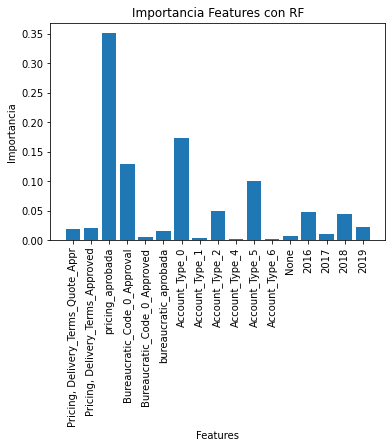

In [126]:
plt.bar(X_train.columns, rf_model.feature_importances_)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features con RF')
plt.show()

In [127]:
rf_model = RandomForestRegressor(random_state=1, n_estimators=5)


rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

loss = log_loss(y_test, preds)
print("Loss: %f" % (loss))

Loss: 0.569889


In [128]:
tree0 = rf_model.estimators_[0]

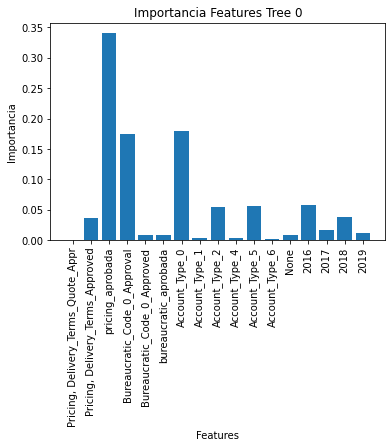

In [129]:
plt.bar(X_train.columns, tree0.feature_importances_)
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.ylabel('Importancia')
plt.title('Importancia Features Tree 0')
plt.show()

In [132]:
kf = KFold(n_splits=5, shuffle=True)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    rf_model = RandomForestRegressor(random_state=1, n_estimators=5)
    rf_model.fit(X_train, y_train)
    preds = rf_model.predict(X_test)

    loss = np.sqrt(log_loss(y_test, preds))
    print("Log loss: %f" % (loss))

Log loss: 1.651943
Log loss: 1.576914
Log loss: 1.664649
Log loss: 1.636369
Log loss: 1.706018


In [133]:
# Set the parameters by cross-validation
tuned_parameters = [{'min_samples_leaf': [1, 3, 5], 'max_depth': [None, 2, 3],
                     'n_estimators': [20, 50]}]

score = 'log_loss'
print("# Tuning hyper-parameters Random Forest Regressor for %s\n" % score)

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=123)

clf = GridSearchCV(\
    RandomForestRegressor(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters:\n")
print(clf.best_params_ )
print()
print("Scores:")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"\
          % (mean, std * 2, params))
print()

y_true, y_pred = y_test, clf.predict(X_test)

# Tuning hyper-parameters Random Forest Regressor for log_loss

Best parameters:

{'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 50}

Scores:
0.166 (+/-0.055) for {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 20}
0.177 (+/-0.045) for {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 50}
0.258 (+/-0.059) for {'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 20}
0.267 (+/-0.046) for {'max_depth': None, 'min_samples_leaf': 3, 'n_estimators': 50}
0.279 (+/-0.036) for {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 20}
0.283 (+/-0.039) for {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 50}
0.103 (+/-0.009) for {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 20}
0.103 (+/-0.009) for {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 50}
0.103 (+/-0.009) for {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 20}
0.103 (+/-0.009) for {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 50}
0.102 (+/-0.009) f

In [134]:
rf_model = RandomForestRegressor(max_depth= None, min_samples_leaf= 1, n_estimators= 50)

rf_model.fit(X.drop('ID', axis=1), y)
preds = rf_model.predict(testX.drop('ID', axis=1))

In [135]:
preds.shape

(2551,)

In [150]:
prediccion = pd.DataFrame({'Opportunity_ID':test.Opportunity_ID, 'Target':preds})
prediccion

,Opportunity_ID,Target
0,10689,0.439646
1,10689,0.439646
2,10689,0.439646
3,10690,0.439646
4,10690,0.439646
...,...,...
2546,12364,0.974776
2547,12365,0.979086
2548,12366,0.195022
2549,12367,0.979086


In [153]:
prediccion_final = prediccion.groupby(['Opportunity_ID']).Target.mean()
prediccion_final = pd.DataFrame({'Opportunity_ID':prediccion_final.index,\
                                 'Target':prediccion_final})
prediccion_final

,Opportunity_ID,Target
Opportunity_ID,,
10689,10689,0.439646
10690,10690,0.439646
10691,10691,0.979086
10692,10692,0.015293
10693,10693,0.000000
...,...,...
12364,12364,0.974776
12365,12365,0.979086
12366,12366,0.195022


In [154]:
prediccion_final.to_csv('prediccion_randomF_1', index=False)

In [137]:
prediccion.to_csv('prediccion_random_forest_2', index=False)

In [148]:
prediccion['Opportunity_ID'] = test['Opportunity_ID']
prediccion

,ID,Target,Opportunity_ID
0,6140,0.439646,10689
1,6146,0.439646,10689
2,6151,0.439646,10689
3,6118,0.439646,10690
4,6124,0.439646,10690
...,...,...,...
2546,16345,0.974776,12364
2547,15218,0.979086,12365
2548,15224,0.195022,12366
2549,7286,0.979086,12367
